# HOUSING: PRICE PREDICTION

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:


1. Which variables are important to predict the price of variable?
2.  How do these variables describe the price of the house?

# Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df_n_train=pd.read_csv('house_train.csv')
df_n_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
df_n_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_n_train.shape

(1168, 81)

O B S E R V A T I O N :-

1. Therefore we have a dataset of 1168 rows and 81 columns.

2. There are so many unnecessary columns in our dataset so that we are going to drop some of these for better data analysis

In [5]:
df_train=df_n_train.drop(['Fence','MoSold','SaleType','SaleCondition','WoodDeckSF','PavedDrive'
                         ,'GarageType','FireplaceQu','Fireplaces','Functional'
                         ,'HalfBath','BsmtHalfBath','BsmtFullBath','LowQualFinSF','CentralAir'
                         ,'HeatingQC','Heating','Electrical','BsmtFinType1','BsmtFinType2'
                         ,'BsmtExposure','Foundation','ExterQual','MasVnrArea','MasVnrType'
                         ,'YearRemodAdd','OverallQual','RoofStyle','RoofMatl','Condition1'
                         ,'Condition2','LotConfig','Neighborhood','LotShape','Alley','LotArea'
                         ,'LotFrontage','Id','Utilities','BsmtFinSF2'],axis=1)

In [6]:
df_train.shape

(1168, 41)

1. After removing the unnecessary columns we have the dataset of 1168 rows and 42 columns.
2. UTILITIES columns has removed because of better performance of model though it is an important       variable ,because it contains only one category which is all houses has the public utitlities.

# Statistical Data Analysis

In [7]:
df_train

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,YrSold,SalePrice
0,120,RL,Pave,Lvl,Gtl,TwnhsE,1Story,5,1976,Plywood,...,205,0,0,0,0,NaN,NaN,0,2007,128000
1,20,RL,Pave,Lvl,Mod,1Fam,1Story,6,1970,Wd Sdng,...,207,0,0,224,0,NaN,NaN,0,2007,268000
2,60,RL,Pave,Lvl,Gtl,1Fam,2Story,5,1996,MetalSd,...,130,0,0,0,0,NaN,NaN,0,2007,269790
3,20,RL,Pave,Lvl,Gtl,1Fam,1Story,6,1977,Plywood,...,122,0,0,0,0,NaN,NaN,0,2010,190000
4,20,RL,Pave,Lvl,Gtl,1Fam,1Story,7,1977,CemntBd,...,0,0,0,0,0,NaN,NaN,0,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,Pave,Lvl,Gtl,1Fam,1Story,5,1967,MetalSd,...,0,0,0,0,0,NaN,NaN,0,2010,122000
1164,20,RL,Pave,Lvl,Gtl,1Fam,1Story,5,1949,VinylSd,...,96,0,0,0,0,NaN,NaN,0,2009,108000
1165,160,RL,Pave,Lvl,Gtl,Twnhs,2Story,6,1976,Plywood,...,0,0,0,0,0,NaN,NaN,0,2009,148500
1166,70,C (all),Pave,Lvl,Gtl,1Fam,2Story,4,1920,BrkFace,...,54,172,0,0,0,NaN,NaN,0,2008,40000


In [8]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
Street            object
LandContour       object
LandSlope         object
BldgType          object
HouseStyle        object
OverallCond        int64
YearBuilt          int64
Exterior1st       object
Exterior2nd       object
ExterCond         object
BsmtQual          object
BsmtCond          object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
MiscFeature       object
MiscVal            int64
YrSold             int64


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   Street         1168 non-null   object 
 3   LandContour    1168 non-null   object 
 4   LandSlope      1168 non-null   object 
 5   BldgType       1168 non-null   object 
 6   HouseStyle     1168 non-null   object 
 7   OverallCond    1168 non-null   int64  
 8   YearBuilt      1168 non-null   int64  
 9   Exterior1st    1168 non-null   object 
 10  Exterior2nd    1168 non-null   object 
 11  ExterCond      1168 non-null   object 
 12  BsmtQual       1138 non-null   object 
 13  BsmtCond       1138 non-null   object 
 14  BsmtFinSF1     1168 non-null   int64  
 15  BsmtUnfSF      1168 non-null   int64  
 16  TotalBsmtSF    1168 non-null   int64  
 17  1stFlrSF       1168 non-null   int64  
 18  2ndFlrSF

We can see many Null values in our columns. Let's interpret and remove those null values 

# Checking and Removing the null values for better performance of our model

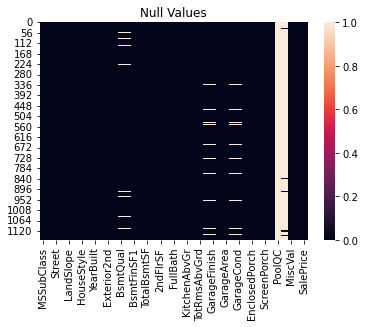

In [10]:
sns.heatmap(df_train.isnull())
plt.title('Null Values')
plt.show()

In [11]:
#Checking for null values in the dataset
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
Street              0
LandContour         0
LandSlope           0
BldgType            0
HouseStyle          0
OverallCond         0
YearBuilt           0
Exterior1st         0
Exterior2nd         0
ExterCond           0
BsmtQual           30
BsmtCond           30
BsmtFinSF1          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
MiscFeature      1124
MiscVal             0
YrSold              0
SalePrice           0
dtype: int64

Therefore there are 2601 rows of null values from this POOLQC and MiscFeature have more null values 
nearly equal to total count so we are going to drop those columns.

In [12]:
df_train=df_train.drop(['PoolQC','MiscFeature'],axis=1)

In [13]:
df_train.shape

(1168, 39)

In [14]:
df_train['GarageYrBlt'].mean()

1978.1938405797102

In [15]:
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean(),inplace=True)

In [16]:
df_train.isnull().sum()

MSSubClass        0
MSZoning          0
Street            0
LandContour       0
LandSlope         0
BldgType          0
HouseStyle        0
OverallCond       0
YearBuilt         0
Exterior1st       0
Exterior2nd       0
ExterCond         0
BsmtQual         30
BsmtCond         30
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
GarageYrBlt       0
GarageFinish     64
GarageCars        0
GarageArea        0
GarageQual       64
GarageCond       64
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
YrSold            0
SalePrice         0
dtype: int64

In [17]:
df_train.dropna(inplace=True)

In [18]:
df_train.shape

(1080, 39)

In [19]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LandContour      0
LandSlope        0
BldgType         0
HouseStyle       0
OverallCond      0
YearBuilt        0
Exterior1st      0
Exterior2nd      0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
YrSold           0
SalePrice        0
dtype: int64

O B S E R V A T I O N S :-

1. Therefore there are 2601 rows of null values from this POOLQC and MiscFeature have more null values 
   nearly equal to total count so we are going to drop those columns.
  
2. We have filled the null values of garage year built column with their mean value using ".fillna()"    function.

3. Therefore we have removed the null values using the command .dropna()function now our dataset is      free from null values.Let's convert the object  into integer.

4. After removing the null values our dataset becomes, ROWS = 1080 and COLUMNS = 39

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1167
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1080 non-null   int64  
 1   MSZoning       1080 non-null   object 
 2   Street         1080 non-null   object 
 3   LandContour    1080 non-null   object 
 4   LandSlope      1080 non-null   object 
 5   BldgType       1080 non-null   object 
 6   HouseStyle     1080 non-null   object 
 7   OverallCond    1080 non-null   int64  
 8   YearBuilt      1080 non-null   int64  
 9   Exterior1st    1080 non-null   object 
 10  Exterior2nd    1080 non-null   object 
 11  ExterCond      1080 non-null   object 
 12  BsmtQual       1080 non-null   object 
 13  BsmtCond       1080 non-null   object 
 14  BsmtFinSF1     1080 non-null   int64  
 15  BsmtUnfSF      1080 non-null   int64  
 16  TotalBsmtSF    1080 non-null   int64  
 17  1stFlrSF       1080 non-null   int64  
 18  2ndFlrSF

Label Encoding

In [21]:
df_train['MSZoning'].value_counts()

RL         864
RM         146
FV          52
RH          11
C (all)      7
Name: MSZoning, dtype: int64

In [22]:
df_train['Street'].value_counts()

Pave    1077
Grvl       3
Name: Street, dtype: int64

In [23]:
df_train['LandContour'].value_counts()

Lvl    972
Bnk     42
HLS     40
Low     26
Name: LandContour, dtype: int64

In [24]:
df_train['LandSlope'].value_counts()

Gtl    1022
Mod      47
Sev      11
Name: LandSlope, dtype: int64

In [25]:
df_train['BldgType'].value_counts()

1Fam      925
TwnhsE     89
Twnhs      25
Duplex     21
2fmCon     20
Name: BldgType, dtype: int64

In [26]:
df_train['HouseStyle'].value_counts()

1Story    527
2Story    350
1.5Fin    106
SLvl       47
SFoyer     26
1.5Unf     10
2.5Unf      9
2.5Fin      5
Name: HouseStyle, dtype: int64

In [27]:
df_train['Exterior1st'].value_counts()

VinylSd    382
HdBoard    169
MetalSd    164
Wd Sdng    154
Plywood     85
CemntBd     37
BrkFace     36
Stucco      20
WdShing     15
AsbShng     14
Stone        2
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64

In [28]:
df_train['Exterior2nd'].value_counts()

VinylSd    372
MetalSd    161
HdBoard    160
Wd Sdng    147
Plywood    105
CmentBd     37
Wd Shng     26
Stucco      21
BrkFace     18
AsbShng     14
ImStucc      8
Brk Cmn      5
Stone        3
AsphShn      2
Other        1
Name: Exterior2nd, dtype: int64

In [29]:
df_train['ExterCond'].value_counts()

TA    952
Gd    111
Fa     15
Ex      2
Name: ExterCond, dtype: int64

In [30]:
df_train['BsmtQual'].value_counts()

Gd    484
TA    475
Ex     94
Fa     27
Name: BsmtQual, dtype: int64

In [31]:
df_train['BsmtCond'].value_counts()

TA    992
Gd     54
Fa     33
Po      1
Name: BsmtCond, dtype: int64

In [32]:
df_train['KitchenQual'].value_counts()

TA    511
Gd    470
Ex     81
Fa     18
Name: KitchenQual, dtype: int64

# Columns which are in object type are transforming with the help of Label Encoding technique.

 # Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
# 1
df_train['MSZoning']=le.fit_transform(df_train['MSZoning'])

In [35]:
le.inverse_transform([0,1,2,3,4])

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

In [36]:
# 2
df_train['Street']=le.fit_transform(df_train['Street'])

In [37]:
le.inverse_transform([0,1])

array(['Grvl', 'Pave'], dtype=object)

In [38]:
# 3
df_train['LandContour']=le.fit_transform(df_train['LandContour'])

In [39]:
df_train['LandContour'].value_counts()

3    972
0     42
1     40
2     26
Name: LandContour, dtype: int64

In [40]:
# 4
df_train['LandSlope']=le.fit_transform(df_train['LandSlope'])

In [41]:
# 6
df_train['BldgType']=le.fit_transform(df_train['BldgType'])

In [42]:
# 7
df_train['HouseStyle']=le.fit_transform(df_train['HouseStyle'])

In [43]:
# 8
df_train['Exterior1st']=le.fit_transform(df_train['Exterior1st'])

In [44]:
# 9
df_train['Exterior2nd']=le.fit_transform(df_train['Exterior2nd'])

In [45]:
# 10
df_train['ExterCond']=le.fit_transform(df_train['ExterCond'])

In [46]:
# 11
df_train['BsmtQual']=le.fit_transform(df_train['BsmtQual'])

In [47]:
# 12
df_train['BsmtCond']=le.fit_transform(df_train['BsmtCond'])

In [48]:
# 13
df_train['KitchenQual']=le.fit_transform(df_train['KitchenQual'])

In [49]:
#14
df_train['GarageQual']=le.fit_transform(df_train['GarageQual'])

In [50]:
#15
df_train['GarageCond']=le.fit_transform(df_train['GarageCond'])

In [51]:
# 16
df_train['GarageFinish']=le.fit_transform(df_train['GarageFinish'])

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1167
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1080 non-null   int64  
 1   MSZoning       1080 non-null   int32  
 2   Street         1080 non-null   int32  
 3   LandContour    1080 non-null   int32  
 4   LandSlope      1080 non-null   int32  
 5   BldgType       1080 non-null   int32  
 6   HouseStyle     1080 non-null   int32  
 7   OverallCond    1080 non-null   int64  
 8   YearBuilt      1080 non-null   int64  
 9   Exterior1st    1080 non-null   int32  
 10  Exterior2nd    1080 non-null   int32  
 11  ExterCond      1080 non-null   int32  
 12  BsmtQual       1080 non-null   int32  
 13  BsmtCond       1080 non-null   int32  
 14  BsmtFinSF1     1080 non-null   int64  
 15  BsmtUnfSF      1080 non-null   int64  
 16  TotalBsmtSF    1080 non-null   int64  
 17  1stFlrSF       1080 non-null   int64  
 18  2ndFlrSF

Therefore the columns which are in object datatype has changed to integer so we can proceed with further steps

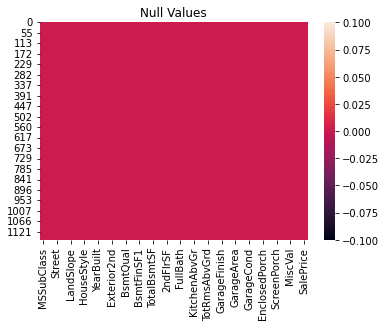

In [53]:
sns.heatmap(df_train.isnull())
plt.title('Null Values')
plt.show()

In [54]:
# checking the null dataset
df_train.isnull().sum().sum()

0

Therfore our dataset has no null values and transformed to int or float datatype

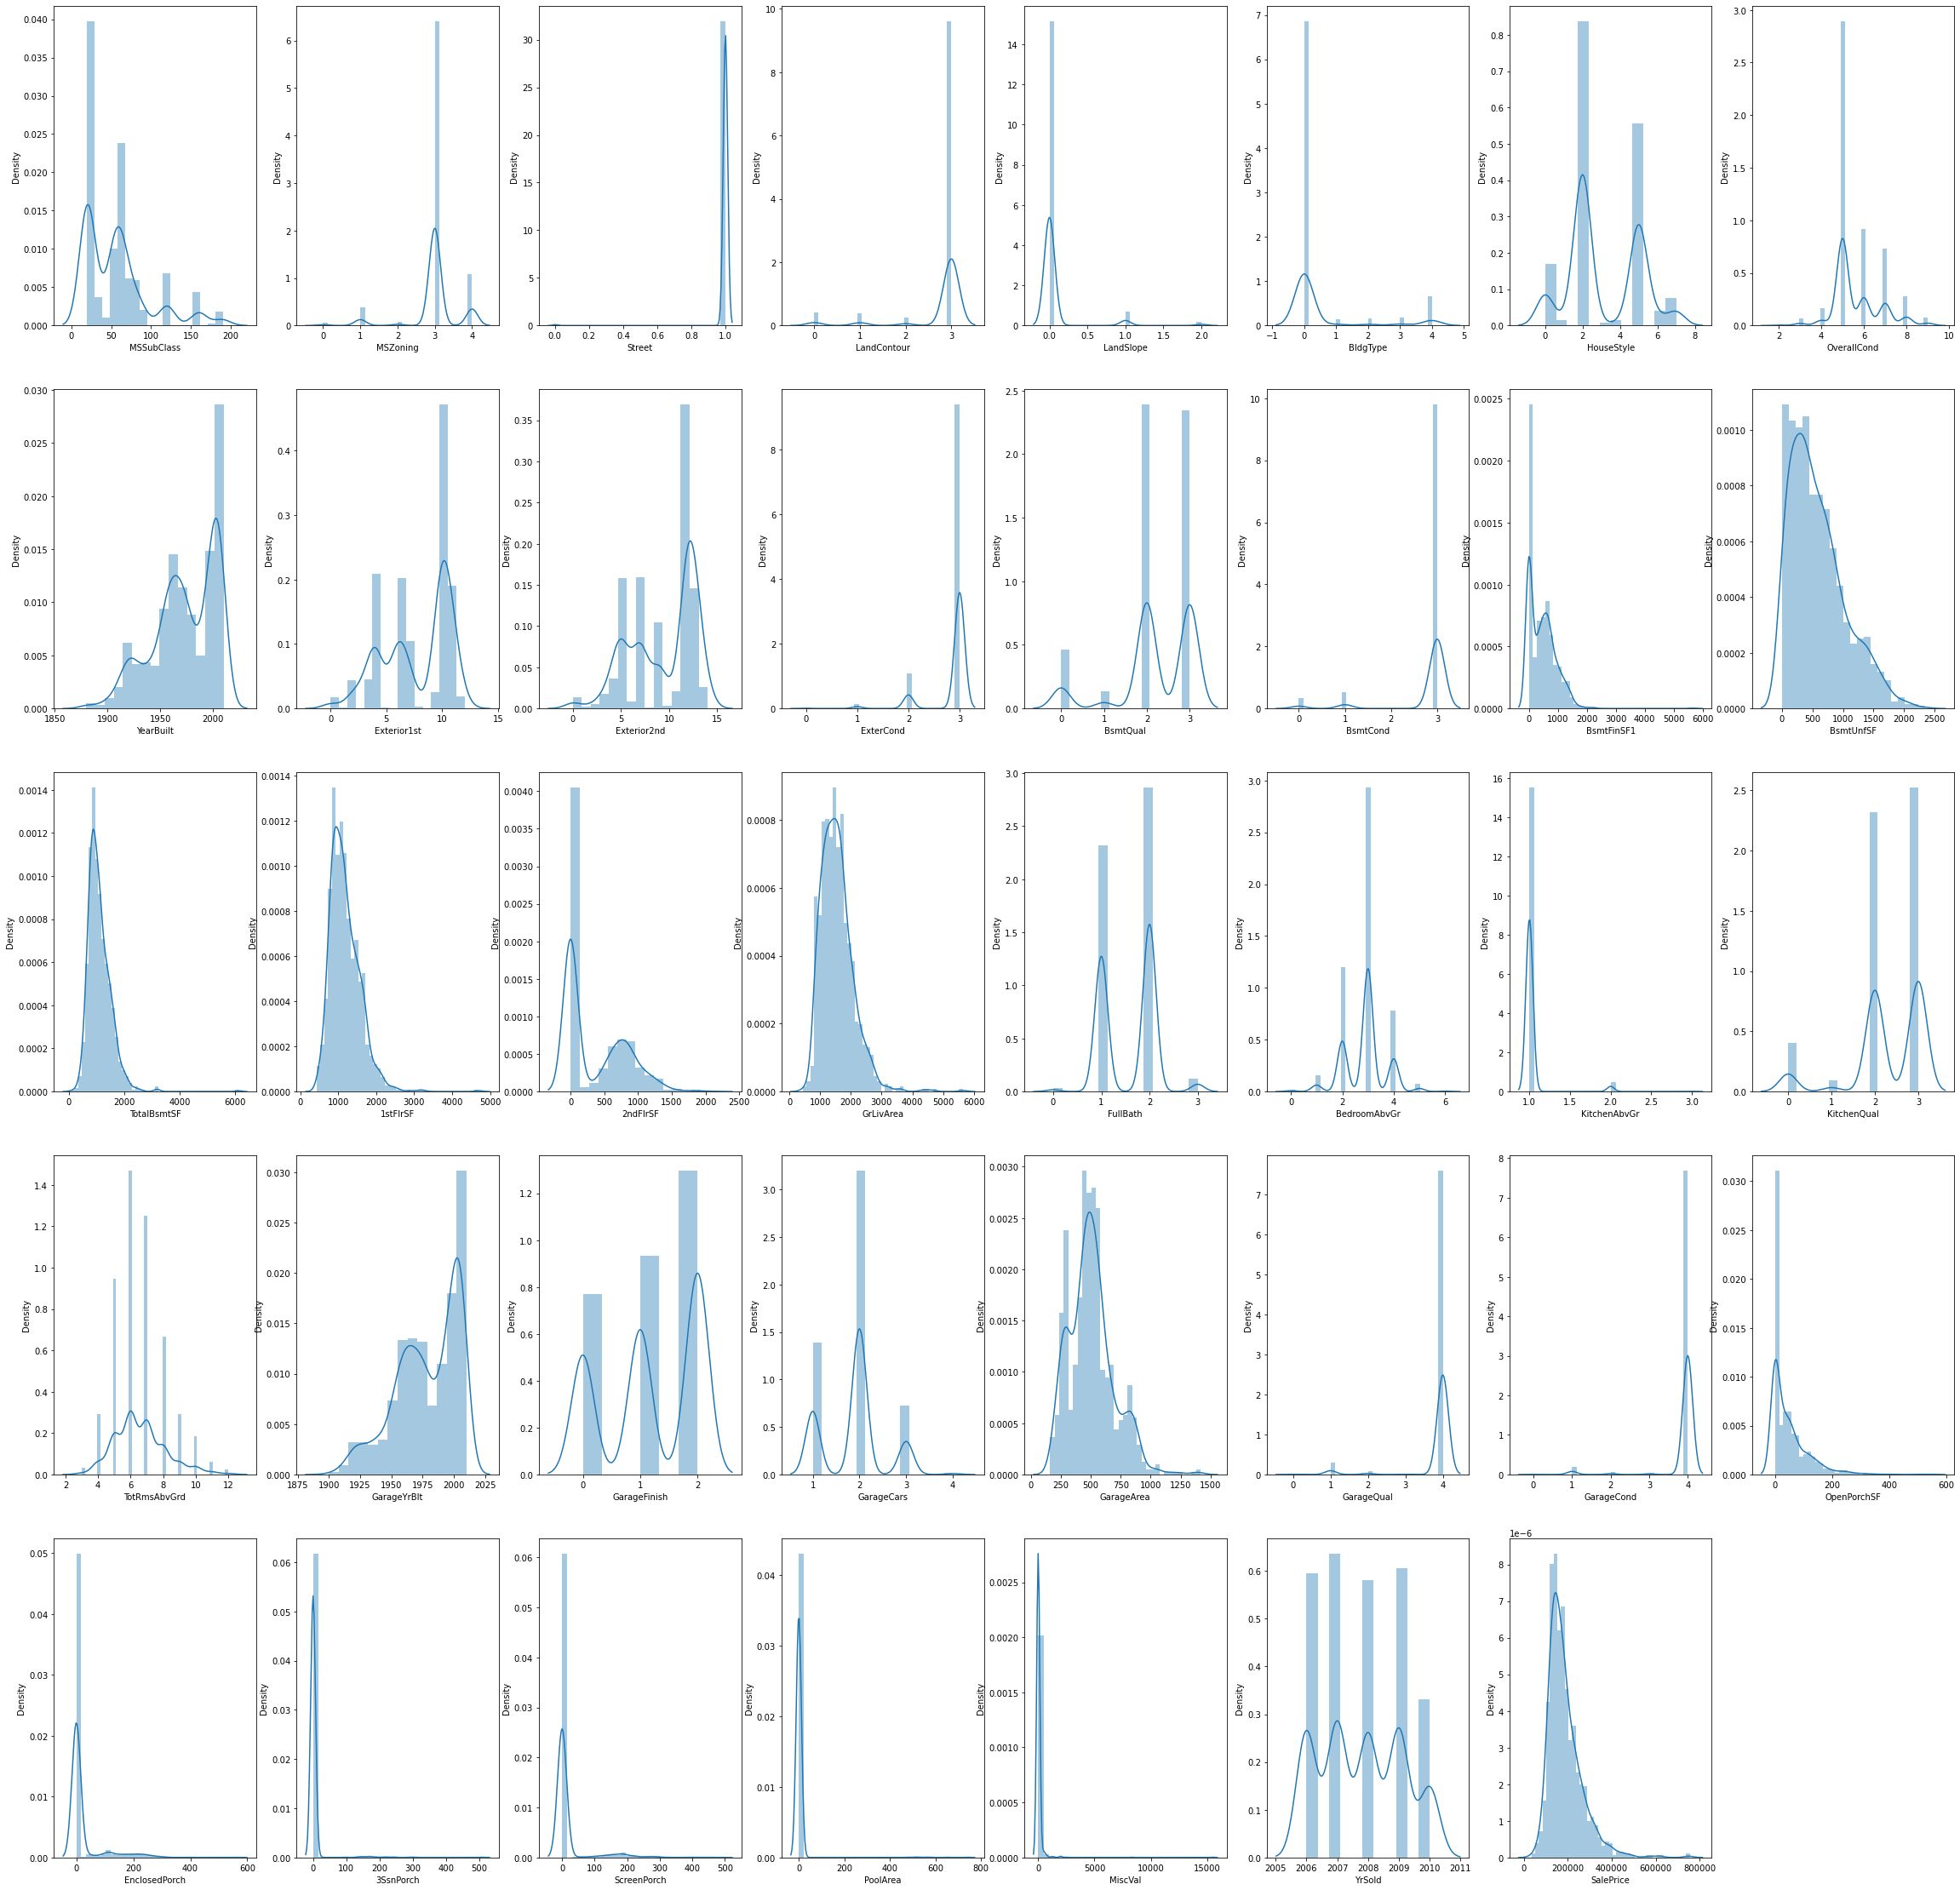

In [55]:
# Univariate Analysis 
collist=df_train.columns.values
ncol=8
nrow=5
plt.figure(figsize=(40,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df_train[collist[i]])

The above plot shows that more number of columns are skewed.Therefore let's see the skewness through the datas

In [56]:
import seaborn as sns
%matplotlib inline

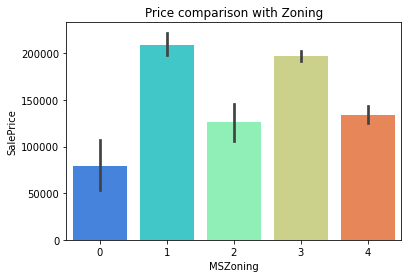

In [57]:
# Bivariate Analysis
sns.barplot(x='MSZoning',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Zoning')
plt.show()

RM - Residential Medium Density and 
RH - Residential High Density have the higher sale  price

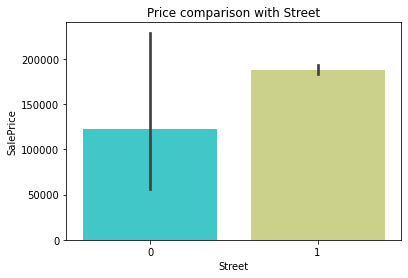

In [58]:
sns.barplot(x='Street',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Street')
plt.show()

1 = Graval. 
Therefore gravel Street prices are higher than pavement Street prices

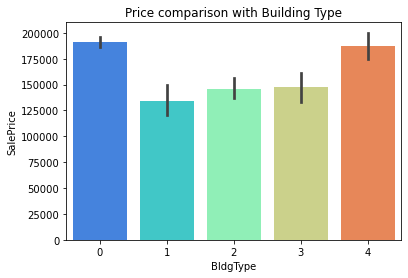

In [59]:
sns.barplot(x='BldgType',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Building Type')
plt.show()

1fam = Single family detached and 2fmcon = Two family Conversion(originally built as one-family dwelling) building types have the higher sale price

In [60]:
df_train['BldgType'].value_counts()

0    925
4     89
3     25
2     21
1     20
Name: BldgType, dtype: int64

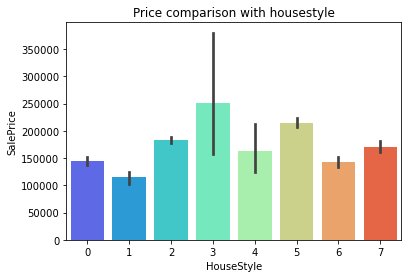

In [61]:
sns.barplot(x='HouseStyle',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with housestyle')
plt.show()

3-SplitLevel and 5-one and one-half storey 2nd level unfinished housestyle have the higher sale price

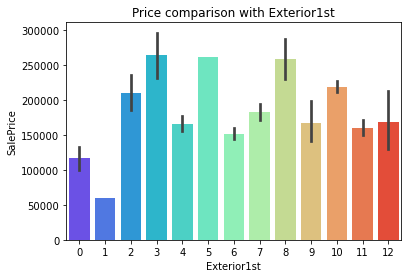

In [62]:
sns.barplot(x='Exterior1st',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Exterior1st')
plt.show()

"Wood Siding" "Wood Shingles" AND "CEMENT BOARD" EXTERIOR COVER HOUSES HAVE THE HIGHER SALE PRICE 

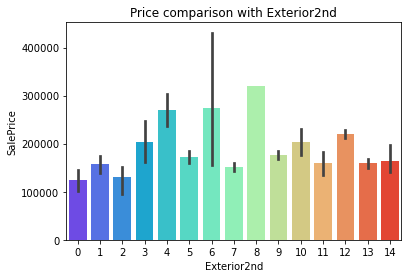

In [63]:
sns.barplot(x='Exterior2nd',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Exterior2nd')
plt.show()

"Brick Face" , "Wood Shingles" AND "Plywood" Exterior covering on house have the higher sale price

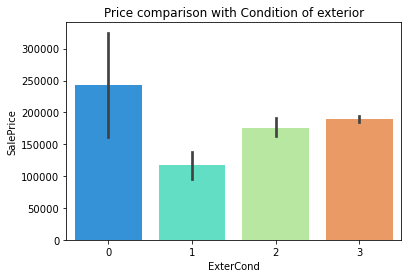

In [64]:
sns.barplot(x='ExterCond',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Condition of exterior')
plt.show()

AVERAGE/TYPICAL present condition of exterior material have the higher sale price

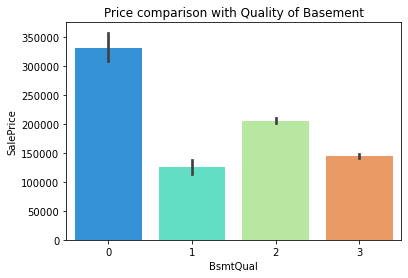

In [65]:
sns.barplot(x='BsmtQual',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Quality of Basement')
plt.show()

Good Quality of height of the basement have the higher sale price

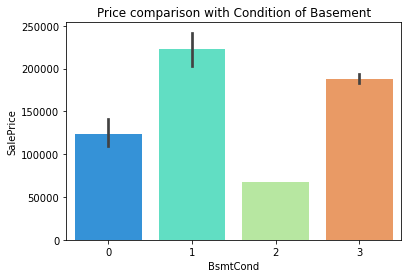

In [66]:
sns.barplot(x='BsmtCond',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Condition of Basement')
plt.show()

GOOD condition of the basement have the higher sale price

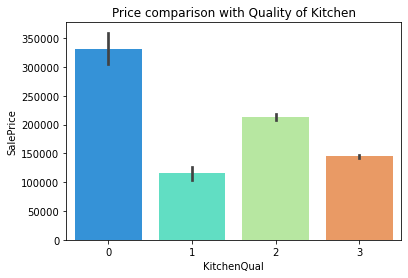

In [67]:
sns.barplot(x='KitchenQual',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Quality of Kitchen')
plt.show()

TYPICAL/AVERAGE Quality of the Kitchen have the higher Sale Price. 

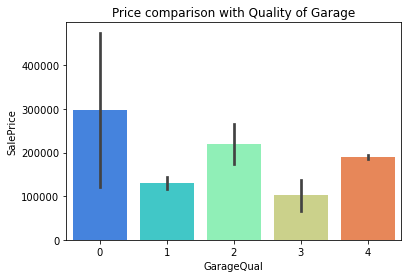

In [68]:
sns.barplot(x='GarageQual',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Quality of Garage')
plt.show()

In [69]:
df_n_train['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

AVERAGE/TYPICAL quality of the garage have the higher sale price

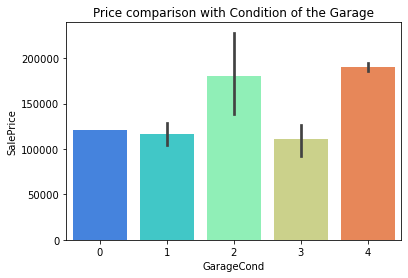

In [70]:
sns.barplot(x='GarageCond',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Condition of the Garage')
plt.show()

In [71]:
df_n_train['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

GOOD AND EXCELLENT condition of the garage have the higher sale price

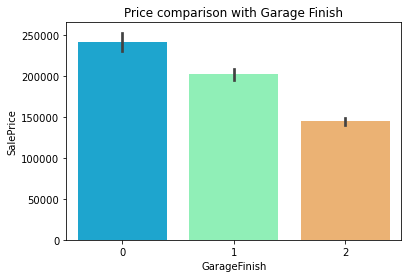

In [72]:
sns.barplot(x='GarageFinish',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Garage Finish')
plt.show()

In [73]:
df_n_train['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

UNFINISHED INTERIOR of the Garage have the higher sale price.

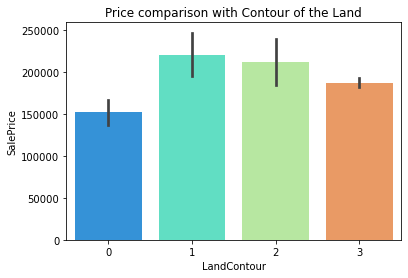

In [74]:
sns.barplot(x='LandContour',y='SalePrice',data=df_train,palette='rainbow').set_title('Price comparison with Contour of the Land')
plt.show()

In [75]:
df_n_train['LandContour'].value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

Bnk - Quick AND Significant rise form the street grade to building
HLS - Significant slope from side to side
These Land Contour have the Higher Sale Price

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

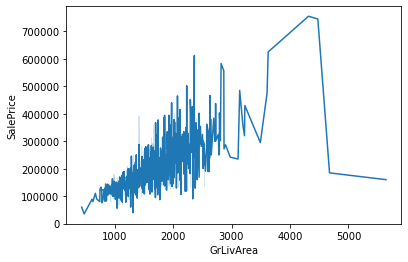

In [76]:
sns.lineplot(x='GrLivArea',y='SalePrice',data=df_train,palette='Rainbow')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

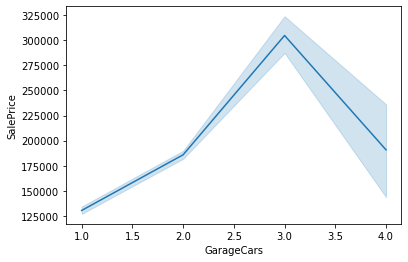

In [77]:
sns.lineplot(x='GarageCars',y='SalePrice',data=df_train,palette='Rainbow')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

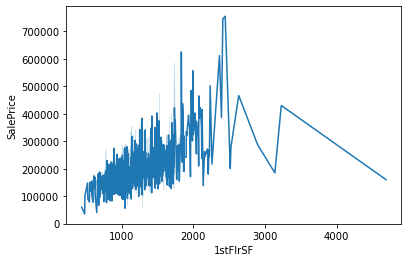

In [78]:
sns.lineplot(x='1stFlrSF',y='SalePrice',data=df_train,palette='Rainbow')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

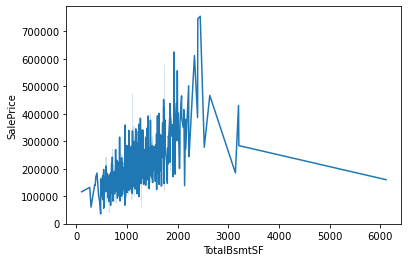

In [79]:
sns.lineplot(x='TotalBsmtSF',y='SalePrice',data=df_train,palette='Rainbow')

In [80]:
df_train['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

In [81]:
df_train['TotRmsAbvGrd'].unique()

array([ 5,  8,  7,  9,  6, 12,  4,  3, 10, 11], dtype=int64)

In [82]:
df_train['YearBuilt'].unique()

array([1976, 1970, 1996, 1977, 2006, 1957, 1965, 1947, 1937, 2003, 1960,
       1955, 1923, 1930, 2007, 2001, 1972, 1950, 1961, 1953, 1918, 2010,
       1922, 1934, 2005, 1946, 1941, 1975, 1978, 1956, 2004, 1982, 2000,
       1948, 2002, 1920, 1992, 1936, 1967, 1989, 1929, 1968, 1959, 1966,
       1916, 1998, 1962, 1974, 1926, 1904, 1995, 1969, 1985, 1963, 1958,
       1892, 2008, 1971, 1980, 1945, 1986, 1981, 1949, 1954, 1925, 1915,
       1921, 1999, 1951, 1993, 1964, 1900, 1919, 1910, 1938, 1880, 1988,
       1935, 1940, 1990, 1979, 1927, 1983, 1994, 2009, 1928, 1917, 1898,
       1997, 1984, 1973, 1952, 1939, 1987, 1890, 1924, 1942, 1931, 1991,
       1932, 1908, 1882, 1905, 1906, 1914, 1893, 1912, 1913], dtype=int64)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

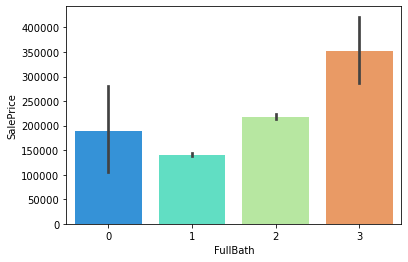

In [83]:
sns.barplot(x='FullBath',y='SalePrice',data=df_train,palette='rainbow')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

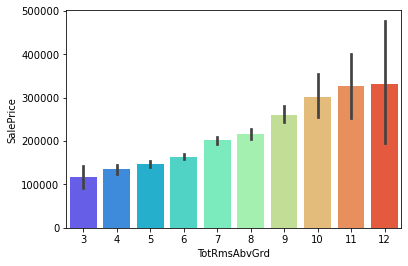

In [84]:
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=df_train,palette='rainbow')

O B S E R V A T I O N S :-



GrLivArea - LIVING AREA Square Feet above Ground | GarageCars = Size of Garage in Car Capacity |  TotRmsAbvGrd = TOTAL Number OF Rooms ABOVE GROUND | FullBath = FULL BATHROOMS ABOVE GROUND 

* IF these variables increases then Value of the houses also increses.

1STFlrSF - 1st floor square feet | TotalBsmtSF - TOTAL BASEMENT AREA IN SQUARE FEET 

* THESE has the steep increse in square feet upto 2000 - 2500 BUT after that there is a SLUMP in the Sale price of the houses this shows that People are not prefering the LARGER AREAS IN BASEMENT AND 1ST FLR AREA

In [85]:
df_train.skew().sort_values(ascending=False)

MiscVal          22.361068
PoolArea         12.727509
3SsnPorch         9.670196
KitchenAbvGr      5.953687
LandSlope         4.824263
ScreenPorch       3.921742
EnclosedPorch     3.163829
TotalBsmtSF       2.520182
BldgType          2.404457
OpenPorchSF       2.251192
SalePrice         2.030236
BsmtFinSF1        1.873921
1stFlrSF          1.546817
GrLivArea         1.511250
MSSubClass        1.412610
BsmtUnfSF         0.910951
GarageArea        0.824807
OverallCond       0.804600
2ndFlrSF          0.769988
TotRmsAbvGrd      0.627432
HouseStyle        0.250283
GarageCars        0.184877
YrSold            0.129521
FullBath          0.008685
BedroomAbvGr     -0.098087
GarageFinish     -0.331681
Exterior1st      -0.539605
Exterior2nd      -0.584295
YearBuilt        -0.649796
GarageYrBlt      -0.671329
BsmtQual         -1.283297
KitchenQual      -1.400961
MSZoning         -1.791581
ExterCond        -3.194854
LandContour      -3.212075
BsmtCond         -3.324956
GarageQual       -4.381879
G

Generally skewness falls under the category of +/- 0.5. Therefore if we see the above output only 6 columns are comes under this category. Therefore we shall treat this using the transformation method.

Checking Correlation

In [86]:
# MultiVariate Analysis
df_train.corr()

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
MSSubClass,1.000000,-0.007718,-0.031214,-0.011316,0.002700,0.737376,0.387567,-0.105919,0.052013,-0.076309,...,-0.016160,-0.036822,0.020293,-0.016521,-0.039196,-0.008108,0.011974,-0.021150,-0.035529,-0.057658
MSZoning,-0.007718,1.000000,0.168471,-0.014608,-0.024099,-0.039037,-0.125340,0.193351,-0.330892,0.007278,...,-0.178491,-0.094292,-0.139633,0.144725,0.005703,0.034306,-0.001176,0.004284,-0.002177,-0.133894
Street,-0.031214,0.168471,1.000000,0.136552,-0.174483,0.005464,0.049088,0.029789,0.039475,-0.004988,...,-0.011840,-0.010154,0.033368,0.018691,0.006690,0.015050,0.004219,-0.036480,-0.034641,0.044146
LandContour,-0.011316,-0.014608,0.136552,1.000000,-0.389463,0.039379,0.083723,-0.038900,0.149383,0.008624,...,0.013077,0.010462,0.046533,-0.070596,-0.039776,0.013599,-0.016530,0.018832,0.010869,0.021908
LandSlope,0.002700,-0.024099,-0.174483,-0.389463,1.000000,-0.039856,-0.036162,0.057935,-0.088625,-0.047392,...,0.008079,-0.013741,-0.043896,-0.003008,0.016813,0.032586,-0.018036,-0.000661,-0.004795,0.027086
BldgType,0.737376,-0.039037,0.005464,0.039379,-0.039856,1.000000,0.032255,-0.191001,0.237585,-0.096154,...,0.068375,0.054184,-0.022128,-0.101834,-0.015034,-0.006695,-0.030677,-0.009350,-0.015600,-0.059403
HouseStyle,0.387567,-0.125340,0.049088,0.083723,-0.036162,0.032255,1.000000,-0.049370,0.254590,-0.028884,...,0.039731,-0.028465,0.160874,-0.048076,-0.014387,-0.056462,0.086933,-0.054564,-0.000585,0.182870
OverallCond,-0.105919,0.193351,0.029789,-0.038900,0.057935,-0.191001,-0.049370,1.000000,-0.418655,-0.079883,...,-0.100420,-0.014654,-0.046240,0.049135,0.039374,0.068767,-0.005435,0.079522,0.068197,-0.102803
YearBuilt,0.052013,-0.330892,0.039475,0.149383,-0.088625,0.237585,0.254590,-0.418655,1.000000,0.113162,...,0.343287,0.277564,0.228621,-0.369530,0.034585,-0.080393,0.001753,-0.035395,-0.007628,0.496005
Exterior1st,-0.076309,0.007278,-0.004988,0.008624,-0.047392,-0.096154,-0.028884,-0.079883,0.113162,1.000000,...,0.012949,0.049589,0.056187,-0.010379,-0.049947,-0.079676,-0.004148,-0.028359,-0.040369,0.104592


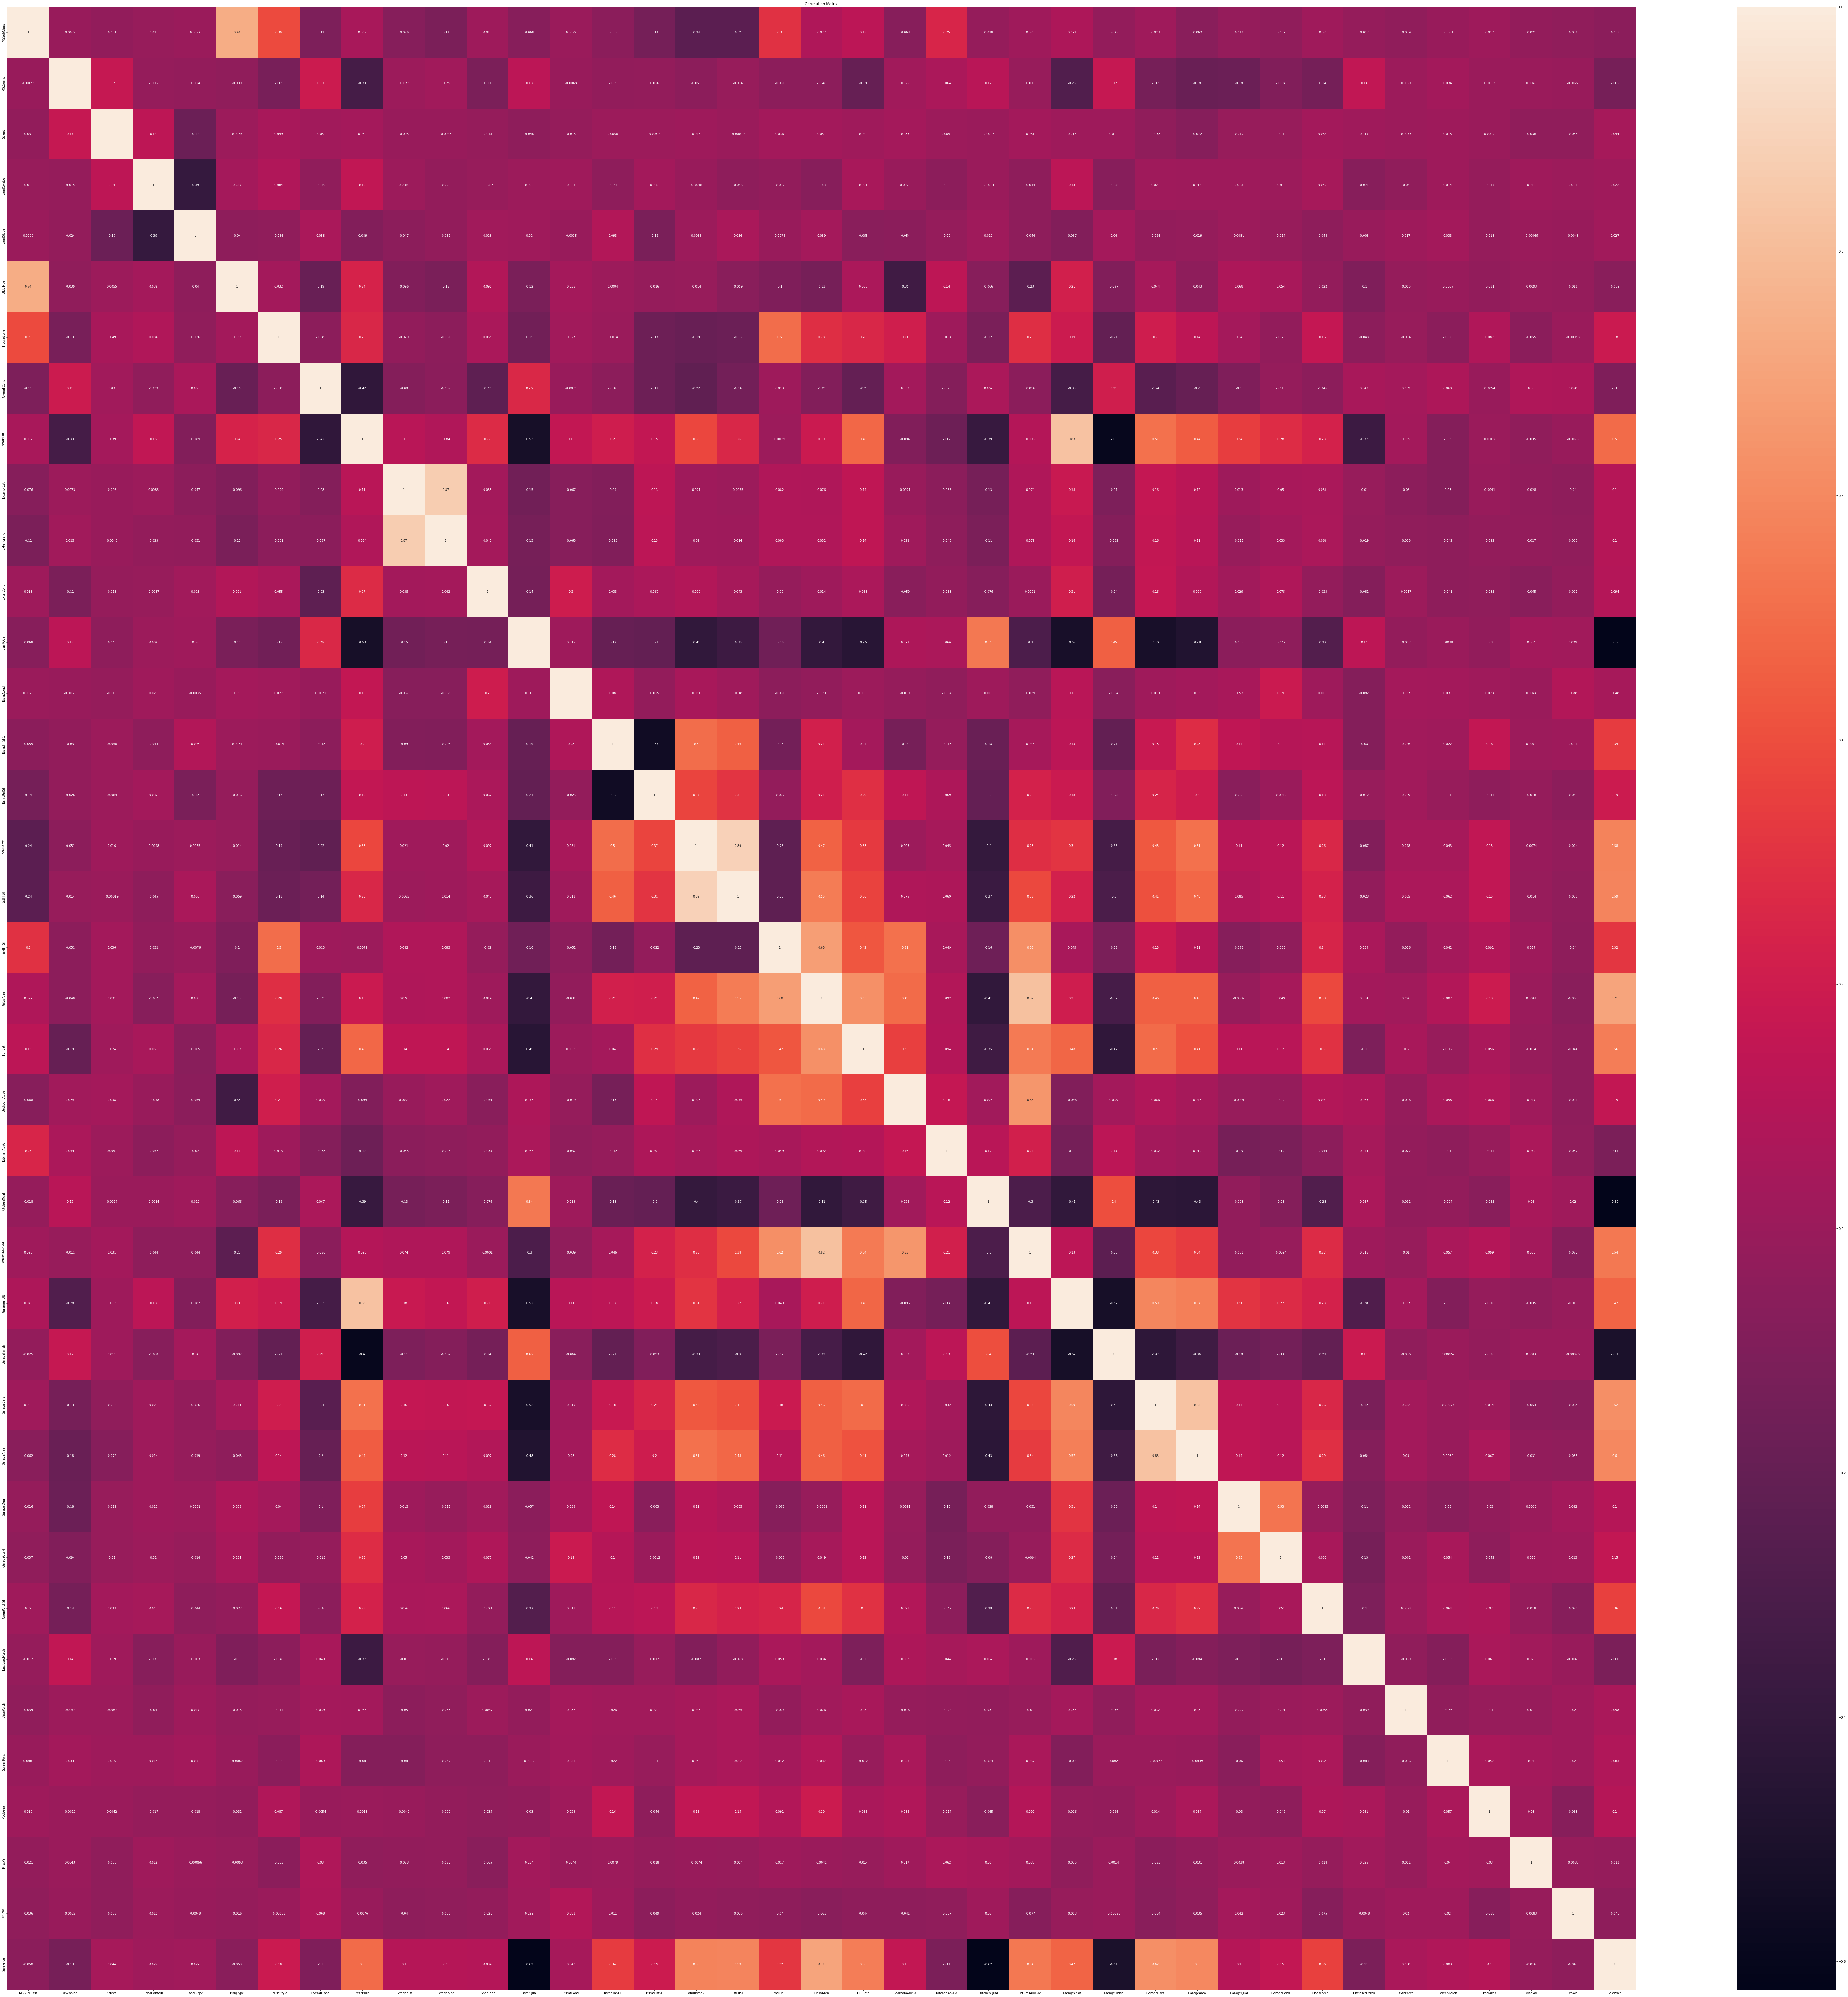

In [87]:
corr_mat=df_train.corr()
# Size of the canvas
plt.figure(figsize=[120,120])
# plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Housing correlation.jpg')
plt.show()

We are unable to find the correlation because our dataset has more number of columns

In [88]:
corr_matrix=df_train.corr()
corr_matrix

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
MSSubClass,1.000000,-0.007718,-0.031214,-0.011316,0.002700,0.737376,0.387567,-0.105919,0.052013,-0.076309,...,-0.016160,-0.036822,0.020293,-0.016521,-0.039196,-0.008108,0.011974,-0.021150,-0.035529,-0.057658
MSZoning,-0.007718,1.000000,0.168471,-0.014608,-0.024099,-0.039037,-0.125340,0.193351,-0.330892,0.007278,...,-0.178491,-0.094292,-0.139633,0.144725,0.005703,0.034306,-0.001176,0.004284,-0.002177,-0.133894
Street,-0.031214,0.168471,1.000000,0.136552,-0.174483,0.005464,0.049088,0.029789,0.039475,-0.004988,...,-0.011840,-0.010154,0.033368,0.018691,0.006690,0.015050,0.004219,-0.036480,-0.034641,0.044146
LandContour,-0.011316,-0.014608,0.136552,1.000000,-0.389463,0.039379,0.083723,-0.038900,0.149383,0.008624,...,0.013077,0.010462,0.046533,-0.070596,-0.039776,0.013599,-0.016530,0.018832,0.010869,0.021908
LandSlope,0.002700,-0.024099,-0.174483,-0.389463,1.000000,-0.039856,-0.036162,0.057935,-0.088625,-0.047392,...,0.008079,-0.013741,-0.043896,-0.003008,0.016813,0.032586,-0.018036,-0.000661,-0.004795,0.027086
BldgType,0.737376,-0.039037,0.005464,0.039379,-0.039856,1.000000,0.032255,-0.191001,0.237585,-0.096154,...,0.068375,0.054184,-0.022128,-0.101834,-0.015034,-0.006695,-0.030677,-0.009350,-0.015600,-0.059403
HouseStyle,0.387567,-0.125340,0.049088,0.083723,-0.036162,0.032255,1.000000,-0.049370,0.254590,-0.028884,...,0.039731,-0.028465,0.160874,-0.048076,-0.014387,-0.056462,0.086933,-0.054564,-0.000585,0.182870
OverallCond,-0.105919,0.193351,0.029789,-0.038900,0.057935,-0.191001,-0.049370,1.000000,-0.418655,-0.079883,...,-0.100420,-0.014654,-0.046240,0.049135,0.039374,0.068767,-0.005435,0.079522,0.068197,-0.102803
YearBuilt,0.052013,-0.330892,0.039475,0.149383,-0.088625,0.237585,0.254590,-0.418655,1.000000,0.113162,...,0.343287,0.277564,0.228621,-0.369530,0.034585,-0.080393,0.001753,-0.035395,-0.007628,0.496005
Exterior1st,-0.076309,0.007278,-0.004988,0.008624,-0.047392,-0.096154,-0.028884,-0.079883,0.113162,1.000000,...,0.012949,0.049589,0.056187,-0.010379,-0.049947,-0.079676,-0.004148,-0.028359,-0.040369,0.104592


In [89]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [90]:
corr_matrix=df_train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.705625
GarageCars       0.622357
GarageArea       0.599835
1stFlrSF         0.586065
TotalBsmtSF      0.579411
FullBath         0.557725
TotRmsAbvGrd     0.541545
YearBuilt        0.496005
GarageYrBlt      0.470217
OpenPorchSF      0.356271
BsmtFinSF1       0.340220
2ndFlrSF         0.315742
BsmtUnfSF        0.191700
HouseStyle       0.182870
BedroomAbvGr     0.152119
GarageCond       0.151381
Exterior1st      0.104592
GarageQual       0.102456
PoolArea         0.101854
Exterior2nd      0.099962
ExterCond        0.094413
ScreenPorch      0.082817
3SsnPorch        0.058384
BsmtCond         0.047767
Street           0.044146
LandSlope        0.027086
LandContour      0.021908
MiscVal         -0.016295
YrSold          -0.042647
MSSubClass      -0.057658
BldgType        -0.059403
OverallCond     -0.102803
KitchenAbvGr    -0.112070
EnclosedPorch   -0.112289
MSZoning        -0.133894
GarageFinish    -0.507284
KitchenQual     -0.620717
BsmtQual    

O B S E R V A T I O N S :-

1. From this correlation values we can clearly see that GrLivArea has strong positive correlation with 
   SalesPrice follwed by GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd.LandContour    has weak positive correlation with SalesPrice.
2. MiscVal has strong negative correlation with SalesPrice and BsmtQual has weak negative correlation    with SalesPrice.

In [91]:
df_train.describe()

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,55.888889,3.009259,0.997222,2.785185,0.063889,0.456481,3.101852,5.617593,1972.794444,7.716667,...,3.862037,3.900926,47.887037,22.212963,3.769444,16.277778,3.729630,48.809259,2007.796296,187674.507407
std,40.786938,0.629744,0.052656,0.690303,0.283287,1.189993,1.902341,1.094711,29.598649,2.999428,...,0.615255,0.515199,65.228622,62.750687,29.753351,57.108231,46.680654,563.332288,1.326701,78574.655649
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1880.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,35311.000000
25%,20.000000,3.000000,1.000000,3.000000,0.000000,0.000000,2.000000,5.000000,1955.000000,6.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,135000.000000
50%,50.000000,3.000000,1.000000,3.000000,0.000000,0.000000,2.000000,5.000000,1975.000000,10.000000,...,4.000000,4.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,170000.000000
75%,70.000000,3.000000,1.000000,3.000000,0.000000,0.000000,5.000000,6.000000,2001.000000,10.000000,...,4.000000,4.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,222000.000000
max,190.000000,4.000000,1.000000,3.000000,2.000000,4.000000,7.000000,9.000000,2010.000000,12.000000,...,4.000000,4.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


# Removing Skewness 

In [92]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LandSlope',
       'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [93]:
df_train['MSSubClass']=np.log(df_train['MSSubClass'])

df_train['OverallCond']=np.log(df_train['OverallCond'])

df_train['TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])

df_train['1stFlrSF']=np.log(df_train['1stFlrSF'])

In [94]:
df_train['YrSold']=np.log(df_train['YrSold'])

In [95]:
df_train['GarageArea']=np.log(df_train['GarageArea'])

Let's Check For Skewness

In [96]:
df_train.skew().sort_values(ascending=False)

MiscVal          22.361068
PoolArea         12.727509
3SsnPorch         9.670196
KitchenAbvGr      5.953687
LandSlope         4.824263
ScreenPorch       3.921742
EnclosedPorch     3.163829
BldgType          2.404457
OpenPorchSF       2.251192
SalePrice         2.030236
BsmtFinSF1        1.873921
GrLivArea         1.511250
BsmtUnfSF         0.910951
2ndFlrSF          0.769988
TotRmsAbvGrd      0.627432
HouseStyle        0.250283
MSSubClass        0.207909
GarageCars        0.184877
1stFlrSF          0.133254
YrSold            0.128717
FullBath          0.008685
BedroomAbvGr     -0.098087
OverallCond      -0.126719
TotalBsmtSF      -0.177796
GarageArea       -0.288858
GarageFinish     -0.331681
Exterior1st      -0.539605
Exterior2nd      -0.584295
YearBuilt        -0.649796
GarageYrBlt      -0.671329
BsmtQual         -1.283297
KitchenQual      -1.400961
MSZoning         -1.791581
ExterCond        -3.194854
LandContour      -3.212075
BsmtCond         -3.324956
GarageQual       -4.381879
G

In [97]:
df_train.shape

(1080, 39)

Plotting Outliers

In [98]:
import seaborn as sns

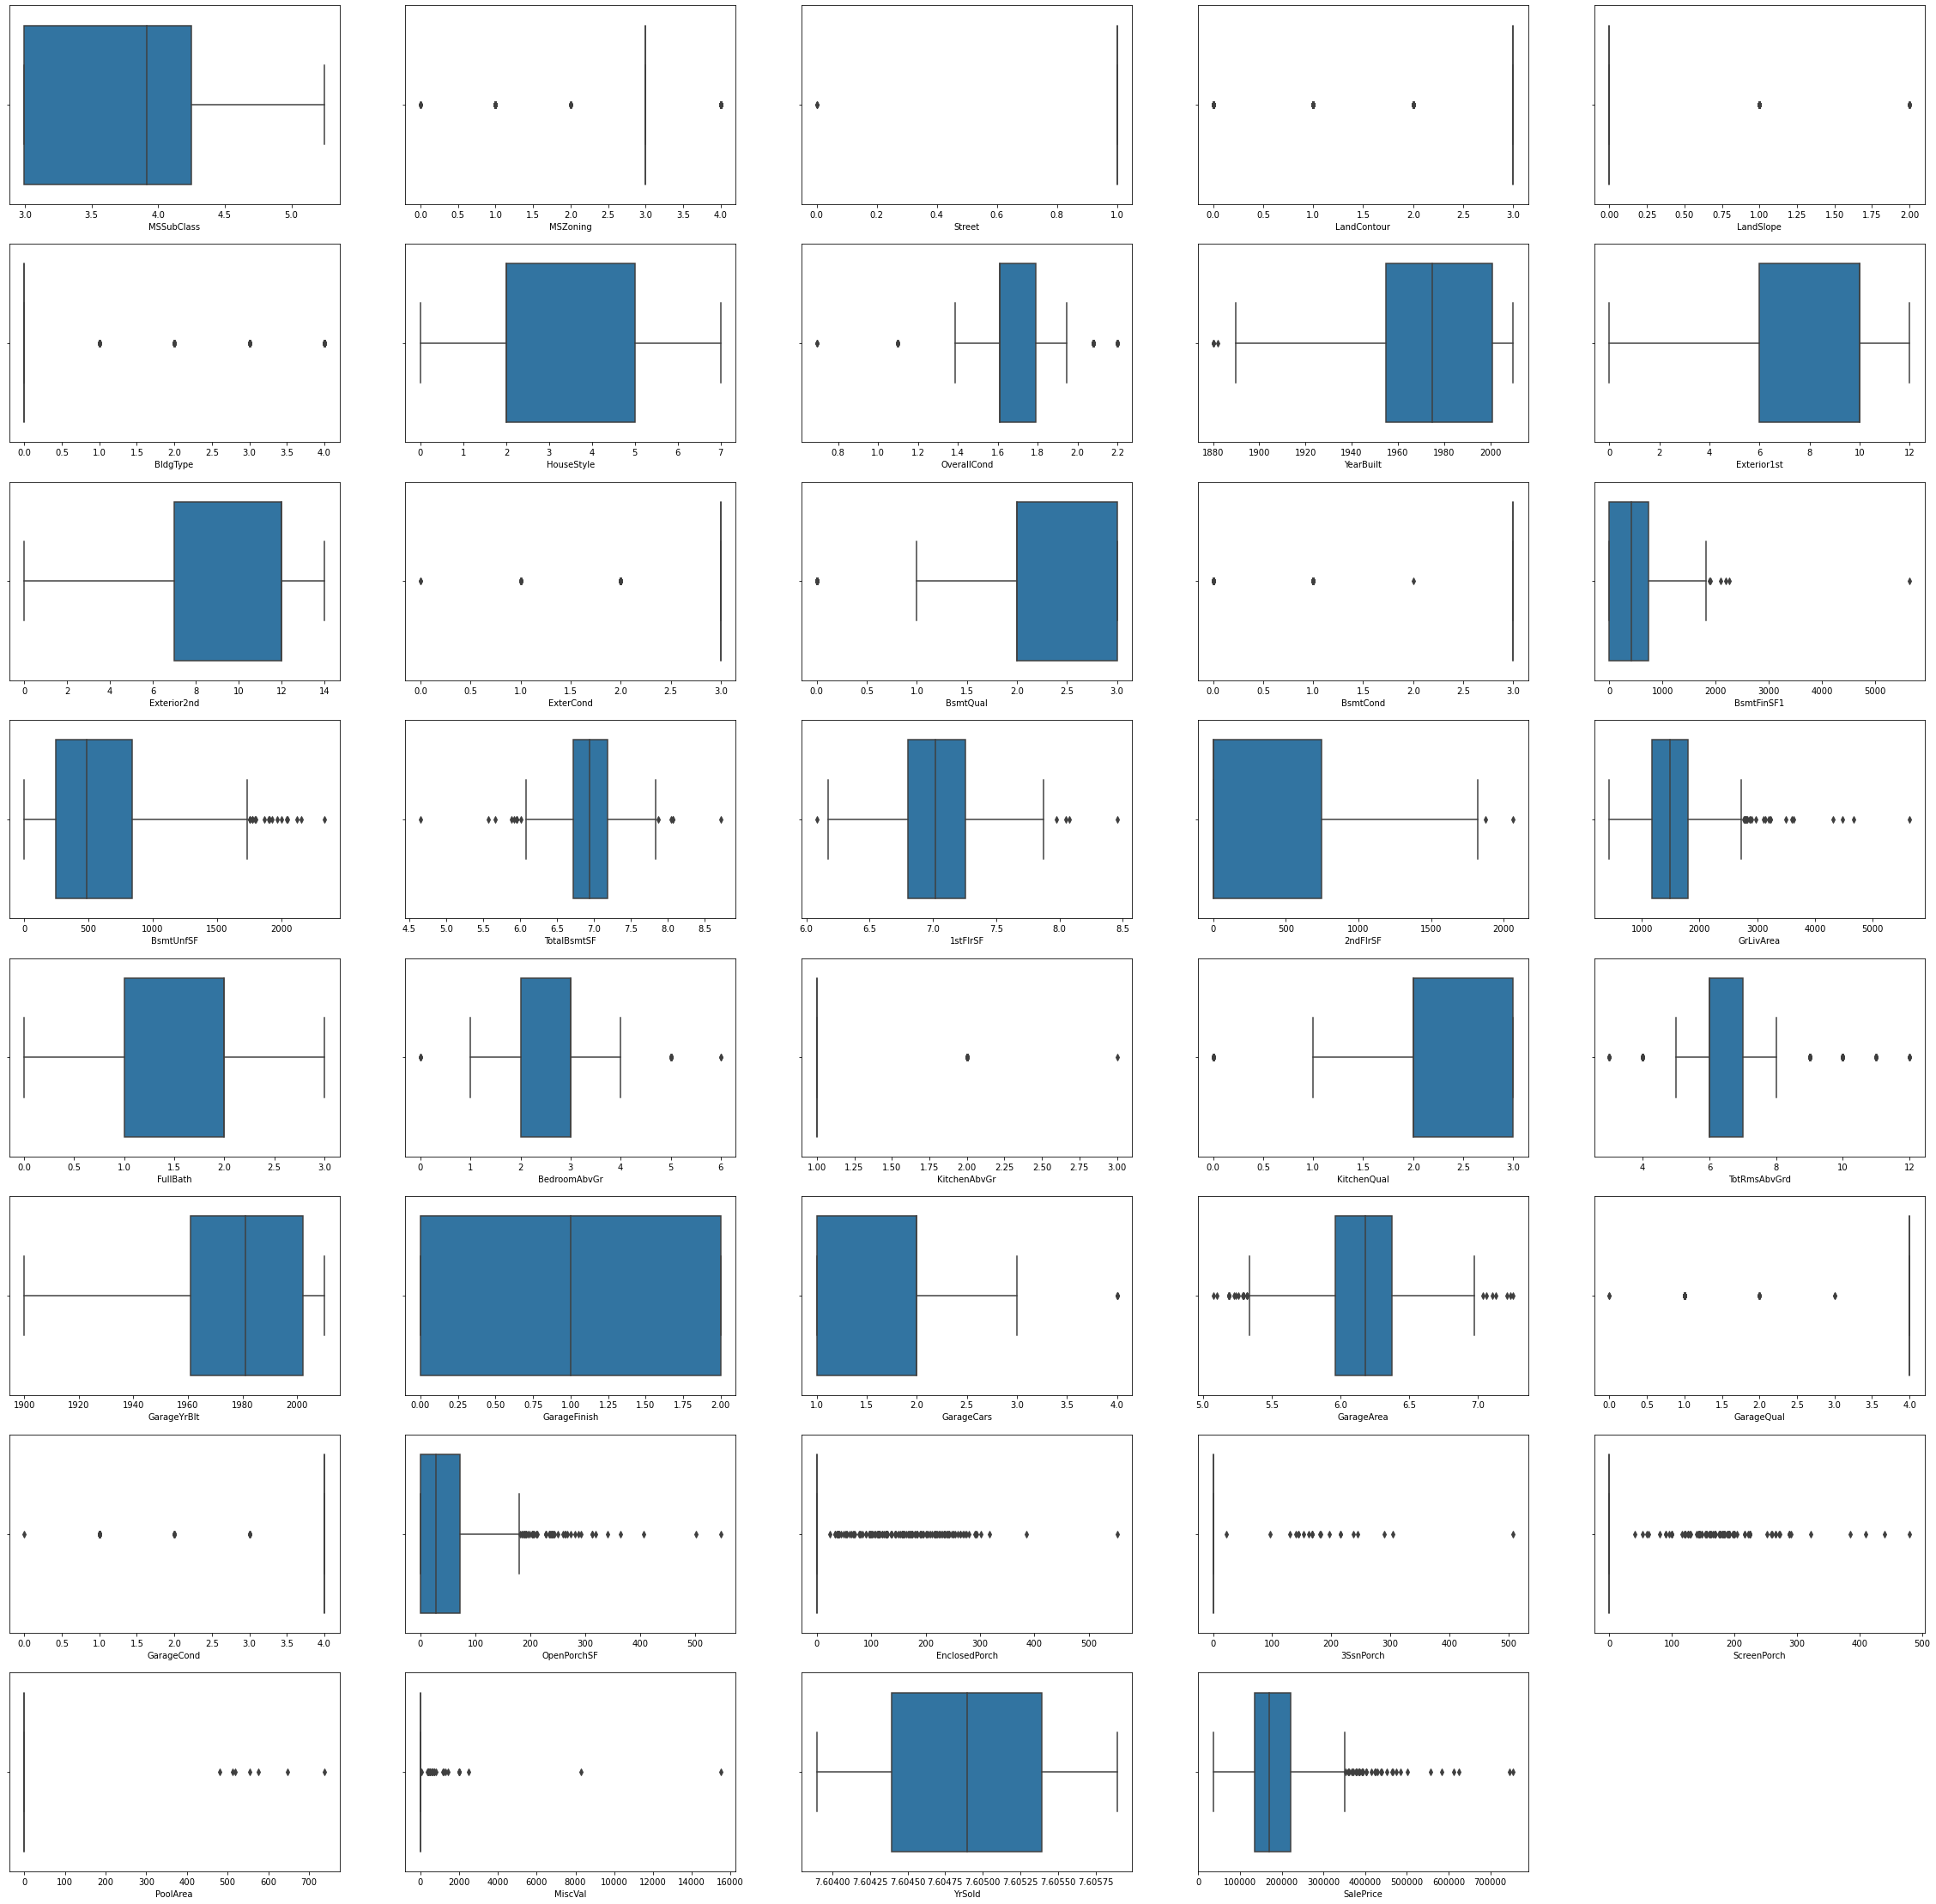

In [99]:
collist=df_train.columns.values
ncol=5
nrow=8
plt.figure(figsize=(40,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_train[collist[i]])

O B S E R V A T I O N S :-
 
1.     Housestyle , FullBath , GarageFinish , YrSold , GarageCars, MSSubclass , GarageFinish,           GarageYrBlt, KitchenQual, 2ndFlrSF, Exterior2nd, BsmtQual, Exterior1st, YearBuilt, MSSUBCLASS these columns doesn't have the outliers.
  
2.    Let's remove outliers in upcoming steps.

Let's Quantify

In [100]:
from scipy.stats import zscore

In [101]:
z=np.abs(zscore(df_train))
z

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,1.448155,0.014710,0.052778,0.311333,0.225631,2.979143,0.579477,0.511656,0.108351,0.239045,...,0.224341,0.192392,2.409767,0.354152,0.126748,0.285166,0.079934,0.086684,0.600300,0.759814
1,1.129558,0.014710,0.052778,0.311333,3.305988,0.383778,0.579477,0.439171,0.094455,1.095160,...,0.224341,0.192392,2.440442,0.354152,0.126748,3.639028,0.079934,0.086684,0.600300,1.022756
2,0.450959,0.014710,0.052778,0.311333,0.225631,0.383778,0.998258,0.511656,0.784370,0.572596,...,0.224341,0.192392,1.259432,0.354152,0.126748,0.285166,0.079934,0.086684,0.600300,1.045548
3,1.129558,0.014710,0.052778,0.311333,0.225631,0.383778,0.579477,0.439171,0.142152,0.239045,...,0.224341,0.192392,1.136729,0.354152,0.126748,0.285166,0.079934,0.086684,1.661300,0.029610
4,1.129558,0.014710,0.052778,0.311333,0.225631,0.383778,0.579477,1.243083,0.142152,1.573250,...,0.224341,0.192392,0.734482,0.354152,0.126748,0.285166,0.079934,0.086684,0.907808,0.347926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,0.546236,0.014710,0.052778,0.311333,0.225631,0.383778,0.579477,3.175666,1.987310,0.428058,...,0.224341,5.633298,0.734482,1.176421,0.126748,0.285166,0.079934,0.086684,1.661300,1.644733
1163,1.129558,0.014710,0.052778,0.311333,0.225631,0.383778,0.579477,0.511656,0.195858,0.572596,...,0.224341,0.192392,0.734482,0.354152,0.126748,0.285166,0.079934,0.086684,1.661300,0.836210
1165,1.862028,0.014710,0.052778,0.311333,0.225631,2.138413,0.998258,0.439171,0.108351,0.239045,...,0.224341,0.192392,0.734482,0.354152,0.126748,0.285166,0.079934,0.086684,0.907808,0.498795
1166,0.672728,4.780756,0.052778,0.311333,0.225631,0.383778,0.998258,1.675373,1.784504,1.906802,...,0.224341,5.633298,0.093759,2.388124,0.126748,0.285166,0.079934,0.086684,0.153942,1.880287


In [102]:
threshold=3
df_new=df_train[(z<3).all(axis=1)]
df_new

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,4.787492,3,1,3,0,4,2,1.609438,1976,7,...,4,4,205,0,0,0,0,0,7.604396,128000
2,4.094345,3,1,3,0,0,5,1.609438,1996,6,...,4,4,130,0,0,0,0,0,7.604396,269790
3,2.995732,3,1,3,0,0,2,1.791759,1977,7,...,4,4,122,0,0,0,0,0,7.605890,190000
4,2.995732,3,1,3,0,0,2,1.945910,1977,3,...,4,4,0,0,0,0,0,0,7.605392,215000
5,4.094345,3,1,3,0,0,5,1.609438,2006,10,...,4,4,17,0,0,0,0,0,7.603898,219210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2.995732,3,1,3,0,0,2,1.791759,1977,7,...,4,4,42,0,0,0,0,0,7.603898,165000
1161,4.094345,3,1,3,0,0,5,1.609438,1999,10,...,4,4,0,0,0,0,0,0,7.605392,225000
1163,2.995732,3,1,3,0,0,2,1.609438,1967,6,...,4,4,0,0,0,0,0,0,7.605890,122000
1165,5.075174,3,1,3,0,3,5,1.791759,1976,7,...,4,4,0,0,0,0,0,0,7.605392,148500


In [103]:
print(df_train.shape)
print(df_new.shape)

(1080, 39)
(702, 39)


In [104]:
df_new

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,4.787492,3,1,3,0,4,2,1.609438,1976,7,...,4,4,205,0,0,0,0,0,7.604396,128000
2,4.094345,3,1,3,0,0,5,1.609438,1996,6,...,4,4,130,0,0,0,0,0,7.604396,269790
3,2.995732,3,1,3,0,0,2,1.791759,1977,7,...,4,4,122,0,0,0,0,0,7.605890,190000
4,2.995732,3,1,3,0,0,2,1.945910,1977,3,...,4,4,0,0,0,0,0,0,7.605392,215000
5,4.094345,3,1,3,0,0,5,1.609438,2006,10,...,4,4,17,0,0,0,0,0,7.603898,219210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2.995732,3,1,3,0,0,2,1.791759,1977,7,...,4,4,42,0,0,0,0,0,7.603898,165000
1161,4.094345,3,1,3,0,0,5,1.609438,1999,10,...,4,4,0,0,0,0,0,0,7.605392,225000
1163,2.995732,3,1,3,0,0,2,1.609438,1967,6,...,4,4,0,0,0,0,0,0,7.605890,122000
1165,5.075174,3,1,3,0,3,5,1.791759,1976,7,...,4,4,0,0,0,0,0,0,7.605392,148500


O B S E R V A T I O N S :-

1. We have removed the outliers and skewness as much as possible.
2. Shape of the new dataset becomes 
   (a) Rows    =    702
   (b) Columns =    39

Splitting independent and target variable to perform scaling,checking outliers

In [105]:
x=df_new.drop('SalePrice',axis=1)
y=df_new['SalePrice']

Feature scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
y=y.values.reshape(-1,1)

In [108]:
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()

In [109]:
x=scaler_x.fit_transform(x)
y=scaler_y.fit_transform(y.reshape(-1,1))

In [110]:
df_new.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LandSlope',
       'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [111]:
df1=pd.DataFrame(data=x,columns=['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LandSlope',
       'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'])

In [112]:
df2=pd.DataFrame(data=y,columns=['SalePrice'])

In [113]:
df_new=pd.concat([df1,df2],axis=1)

In [114]:
df_new

,MSSubClass,MSZoning,Street,LandContour,LandSlope,BldgType,HouseStyle,OverallCond,YearBuilt,Exterior1st,...,GarageQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,0.795881,0.5,0.0,1.0,0.0,1.00,0.285714,0.275170,0.673267,0.583333,...,0.0,0.0,0.843621,0.0,0.0,0.0,0.0,0.0,0.250187,0.182764
1,0.487992,0.5,0.0,1.0,0.0,0.00,0.714286,0.275170,0.871287,0.500000,...,0.0,0.0,0.534979,0.0,0.0,0.0,0.0,0.0,0.250187,0.604131
2,0.000000,0.5,0.0,1.0,0.0,0.00,0.285714,0.500000,0.683168,0.583333,...,0.0,0.0,0.502058,0.0,0.0,0.0,0.0,0.0,1.000000,0.367013
3,0.000000,0.5,0.0,1.0,0.0,0.00,0.285714,0.690091,0.683168,0.250000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.750187,0.441308
4,0.487992,0.5,0.0,1.0,0.0,0.00,0.714286,0.275170,0.970297,0.833333,...,0.0,0.0,0.069959,0.0,0.0,0.0,0.0,0.0,0.000000,0.453819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.000000,0.5,0.0,1.0,0.0,0.00,0.285714,0.500000,0.683168,0.583333,...,0.0,0.0,0.172840,0.0,0.0,0.0,0.0,0.0,0.000000,0.292719
698,0.487992,0.5,0.0,1.0,0.0,0.00,0.714286,0.275170,0.900990,0.833333,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.750187,0.471025
699,0.000000,0.5,0.0,1.0,0.0,0.00,0.285714,0.275170,0.584158,0.500000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.164933
700,0.923666,0.5,0.0,1.0,0.0,0.75,0.714286,0.500000,0.673267,0.583333,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.750187,0.243685


In [115]:
x=df_new.drop('SalePrice',axis=1)
y=df_new['SalePrice']

In [116]:
x.shape , y.shape

((702, 38), (702,))

Training process Begin

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [119]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((561, 38), (141, 38), (561,), (141,))

In [120]:
lr=LinearRegression()

In [121]:
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,2.274891e-03
MSZoning,-4.537628e-02
Street,1.413473e+13
LandContour,-6.733638e-03
LandSlope,-4.903363e+12
BldgType,-2.048583e-02
HouseStyle,-1.396248e-02
OverallCond,8.078970e-02
YearBuilt,1.042607e-01
Exterior1st,1.463924e-02


In [123]:
lr.intercept_

0.15087369031349357

To make Predictions on test data

In [124]:
y_pred1=lr.predict(x_test)

In [125]:
comp_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred1})

In [126]:
comp_df

,Actual Price,Predicted Price
575,0.278455,0.298579
421,0.377415,0.454228
331,0.263001,0.286291
189,0.175334,0.197393
185,0.628529,0.525766
...,...,...
433,0.364042,0.444652
119,0.390490,0.379696
82,0.616642,0.644655
241,0.191679,0.175570


In [127]:
print('Errors :')
print('Mean Squared Errors :',mean_squared_error(y_test,y_pred1))
print('Mean Absolute Errors :',mean_absolute_error(y_test,y_pred1))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred1)))

Errors :
Mean Squared Errors : 0.005988964108216794
Mean Absolute Errors : 0.05438965788401245
Root Mean Squared Error : 0.0773883977623054


In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [129]:
lr=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
r2score=r2_score(y_test,y_pred1)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=84.03239233377249,cross_value_score=85.8470046773879,and difference=-1.8146123436154085


Here, with Linear regressor model has error pretty much close to 0. Therefore it is considered has very good model.Let's see the other model performance 

2. Random Forest Regressor model 

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rf=RandomForestRegressor()

In [132]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [133]:
y_pred2=rf.predict(x_test)

In [134]:
comp_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred2})

In [135]:
print('Errors :')
print('Mean Squared Errors :',mean_squared_error(y_test,y_pred2))
print('Mean Absolute Errors :',mean_absolute_error(y_test,y_pred2))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred2)))

Errors :
Mean Squared Errors : 0.007046079402840284
Mean Absolute Errors : 0.0521199454122011
Root Mean Squared Error : 0.083940928055629


In [136]:
r2score=r2_score(y_test,y_pred2)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=81.21394126652403,cross_value_score=85.94540340876392,and difference=-4.7314621422398915


Mean Squared and Root Mean squared values are little bit high when compared to linear regression

3. Decision Tree Regressor Model

In [137]:
from sklearn.tree import DecisionTreeRegressor

In [138]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=1)

In [139]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=1)

In [140]:
y_pred3=dt.predict(x_test)

In [141]:
comp_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred3})

In [142]:
comp_df

,Actual Price,Predicted Price
575,0.278455,0.249179
421,0.377415,0.474813
331,0.263001,0.165185
189,0.175334,0.213068
185,0.628529,0.474813
...,...,...
433,0.364042,0.347155
119,0.390490,0.474813
82,0.616642,0.474813
241,0.191679,0.165185


In [143]:
print('Errors :')
print('Mean Squared Errors :',mean_squared_error(y_test,y_pred3))
print('Mean Absolute Errors :',mean_absolute_error(y_test,y_pred3))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred3)))

Errors :
Mean Squared Errors : 0.012850587803869886
Mean Absolute Errors : 0.07610273877738784
Root Mean Squared Error : 0.11336043314962185


In [144]:
r2score=r2_score(y_test,y_pred3)
cvscore=cross_val_score(dt,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=65.73812421899814,cross_value_score=66.48509965753698,and difference=-0.7469754385388399


Comparing the above models this model produces higher errors. Let's see the another model

4. Support Vector Regressor

In [145]:
from sklearn.svm import SVR

In [146]:
svr=SVR()

In [147]:
svr.fit(x_train,y_train)

SVR()

In [148]:
y_pred4=svr.predict(x_test)

In [149]:
comp_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred4})

In [150]:
comp_df

,Actual Price,Predicted Price
575,0.278455,0.322637
421,0.377415,0.515674
331,0.263001,0.289570
189,0.175334,0.195931
185,0.628529,0.676315
...,...,...
433,0.364042,0.422701
119,0.390490,0.357534
82,0.616642,0.704691
241,0.191679,0.199359


In [151]:
print('Errors :')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred4))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred4))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred4)))

Errors :
Mean Squared Error : 0.005504096180973042
Mean Absolute Error : 0.05134549243958479
Root Mean Squared Error : 0.07418959617744958


In [152]:
r2score=r2_score(y_test,y_pred4)
cvscore=cross_val_score(svr,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=85.32513356452107,cross_value_score=84.16648161246837,and difference=1.1586519520526934


5. SGD Regressor Model

In [153]:
from sklearn.linear_model import SGDRegressor

In [154]:
sgd=SGDRegressor()

In [155]:
sgd.fit(x_train,y_train)

SGDRegressor()

In [156]:
y_pred5=sgd.predict(x_test)

In [157]:
comp_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred5})

In [158]:
comp_df

,Actual Price,Predicted Price
575,0.278455,0.370717
421,0.377415,0.444883
331,0.263001,0.296944
189,0.175334,0.146812
185,0.628529,0.485117
...,...,...
433,0.364042,0.451801
119,0.390490,0.414705
82,0.616642,0.499613
241,0.191679,0.204062


In [159]:
print('Errors :')
print('Mean Squared Error :',mean_squared_error(y_test,y_pred5))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred5))
print('Root Mean Sqquared Error :',np.sqrt(mean_squared_error(y_test,y_pred5)))

Errors :
Mean Squared Error : 0.009092362038597604
Mean Absolute Error : 0.06575962021145332
Root Mean Sqquared Error : 0.09535387794210366


In [160]:
r2score=r2_score(y_test,y_pred5)
cvscore=cross_val_score(sgd,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=75.75820005459089,cross_value_score=77.30818832896811,and difference=-1.5499882743772275


Among these models SUPPORT VECTOR REGRESSOR has the highest accuracy 

Visualizing the Actual and Predicted Prices

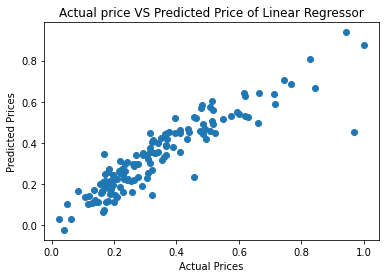

In [161]:
plt.scatter(y_test,y_pred1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price VS Predicted Price of Linear Regressor")
plt.show()

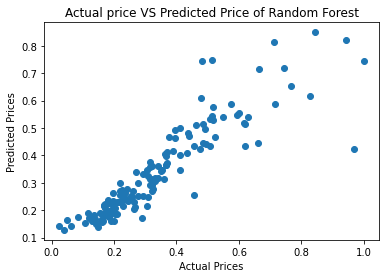

In [162]:
plt.scatter(y_test,y_pred2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price VS Predicted Price of Random Forest")
plt.show()

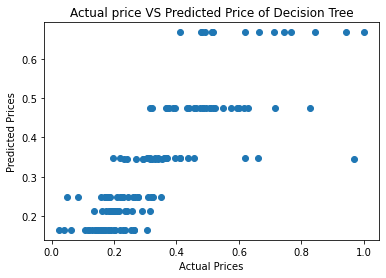

In [163]:
plt.scatter(y_test,y_pred3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price VS Predicted Price of Decision Tree")
plt.show()

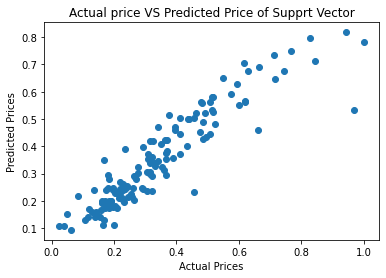

In [164]:
plt.scatter(y_test,y_pred4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price VS Predicted Price of Supprt Vector")
plt.show()

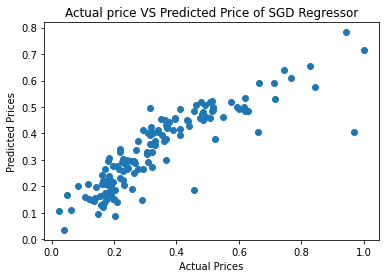

In [165]:
plt.scatter(y_test,y_pred5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price VS Predicted Price of SGD Regressor")
plt.show()

# SAVING THE MODEL

In [224]:
import pickle

In [225]:
filename="Housing_price_trained.pkl"
pickle.dump(svr,open(filename,"wb"))

# From the above model evaluation we can clearly see that "Support Vector Regressor" is performing well.

# Therefore we are using this model to predict the Test Dataset

In [168]:
df_n_test=pd.read_csv("house_test.csv")

In [169]:
pd.set_option('display.max_columns',500)

In [170]:
df_n_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [171]:
df_n_test.shape

(292, 80)

In [172]:
#checking all the column names
list(df_n_test.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [173]:
#Checking the datatype and null values of the variables in the dataset
df_n_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Handling Null Values :-

In [174]:
# Checking the Null values
for col in df_n_test.columns:
    print("\nTitle :",col,"\nNan Values :",df_n_test[col].isnull().sum())


Title : Id 
Nan Values : 0

Title : MSSubClass 
Nan Values : 0

Title : MSZoning 
Nan Values : 0

Title : LotFrontage 
Nan Values : 45

Title : LotArea 
Nan Values : 0

Title : Street 
Nan Values : 0

Title : Alley 
Nan Values : 278

Title : LotShape 
Nan Values : 0

Title : LandContour 
Nan Values : 0

Title : Utilities 
Nan Values : 0

Title : LotConfig 
Nan Values : 0

Title : LandSlope 
Nan Values : 0

Title : Neighborhood 
Nan Values : 0

Title : Condition1 
Nan Values : 0

Title : Condition2 
Nan Values : 0

Title : BldgType 
Nan Values : 0

Title : HouseStyle 
Nan Values : 0

Title : OverallQual 
Nan Values : 0

Title : OverallCond 
Nan Values : 0

Title : YearBuilt 
Nan Values : 0

Title : YearRemodAdd 
Nan Values : 0

Title : RoofStyle 
Nan Values : 0

Title : RoofMatl 
Nan Values : 0

Title : Exterior1st 
Nan Values : 0

Title : Exterior2nd 
Nan Values : 0

Title : MasVnrType 
Nan Values : 1

Title : MasVnrArea 
Nan Values : 1

Title : ExterQual 
Nan Values : 0

Title : Exte

In [176]:
pd.set_option('display.max_rows',None)

In [177]:
# Finding the Percentage of Null VAlues in each column
df_n_test.isna().mean().round(4)*100

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage       15.41
LotArea            0.00
Street             0.00
Alley             95.21
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
YearBuilt          0.00
YearRemodAdd       0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.34
MasVnrArea         0.34
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
BsmtQual           2.40
BsmtCond           2.40
BsmtExposure       2.40
BsmtFinType1       2.40
BsmtFinSF1         0.00
BsmtFinType2       2.40
BsmtFinSF2         0.00
BsmtUnfSF          0.00
TotalBsmtSF        0.00
Heating            0.00
HeatingQC          0.00
CentralAir      

In [178]:
df_n_test['Alley'].fillna("NA",inplace=True)
df_n_test['Alley'].isnull().sum()

0

In [179]:
df_n_test['Fence'].fillna("NA",inplace=True)
df_n_test['Fence'].isnull().sum()

0

In [180]:
df_n_test['PoolQC'].fillna("NA",inplace=True)
df_n_test['Fence'].isnull().sum()

0

In [181]:
df_n_test['MiscFeature'].fillna("NA",inplace=True)
df_n_test['MiscFeature'].isnull().sum()

0

In [183]:
df_n_test['FireplaceQu'].fillna("NA",inplace=True)
df_n_test['FireplaceQu'].isnull().sum()

0

In [184]:
df_n_test['GarageType'].fillna("NA",inplace=True)
df_n_test['GarageType'].isnull().sum()

0

In [193]:
df_n_test['GarageFinish'].fillna("NA",inplace=True)
df_n_test['GarageFinish'].isnull().sum()

0

In [194]:
df_n_test['GarageQual'].fillna("NA",inplace=True)
df_n_test['GarageQual'].isnull().sum()

0

In [195]:
df_n_test['GarageCond'].fillna("NA",inplace=True)
df_n_test['GarageCond'].isnull().sum()

0

In [196]:
df_n_test['BsmtQual'].fillna("NA",inplace=True)
df_n_test['BsmtQual'].isnull().sum()

0

In [189]:
df_n_test['BsmtCond'].fillna("NA",inplace=True)
df_n_test['BsmtCond'].fillna("NA",inplace=True)

In [197]:
df_n_test['BsmtExposure'].fillna("NA",inplace=True)
df_n_test['BsmtExposure'].isnull().sum()

0

In [198]:
df_n_test['BsmtFinType1'].fillna("NA",inplace=True)
df_n_test['BsmtFinType1'].isnull().sum()

0

In [199]:
df_n_test['BsmtFinType2'].fillna("NA",inplace=True)
df_n_test['BsmtFinType2'].isnull().sum()

0

In [200]:
df_n_test['MasVnrType'].fillna("NA",inplace=True)
df_n_test['MasVnrType'].isnull().sum()

0

In [201]:
df_n_test['MasVnrArea'].fillna(df_n_test['MasVnrArea'].mean(),inplace=True)
df_n_test['MasVnrArea'].isnull().sum()

0

In [202]:
df_n_test['LotFrontage'].fillna(df_n_test['LotFrontage'].mean(),inplace=True)
df_n_test['LotFrontage'].isnull().sum()

0

In [203]:
df_test=df_n_test.dropna()

In [204]:
df_test.shape

(274, 80)

In [205]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

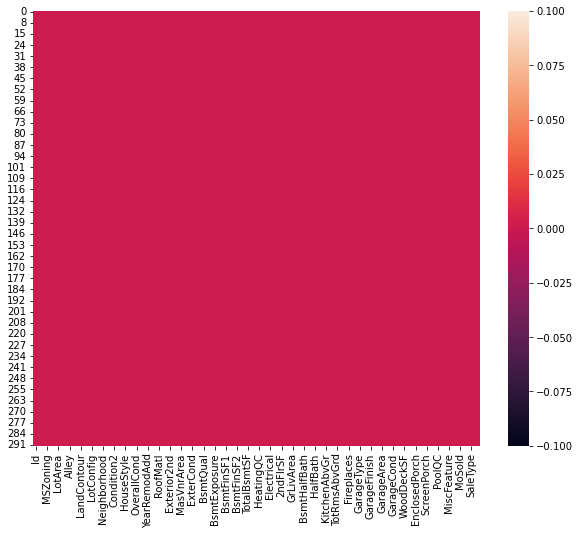

In [206]:
# Confirming Null Value
plt.figure(figsize=(10,8))
sns.heatmap(df_test.isnull())
plt.show()

In [233]:
df_new=df_test.drop(['Fence','MoSold','SaleType','SaleCondition','WoodDeckSF','PavedDrive'
                         ,'GarageType','FireplaceQu','Fireplaces','Functional'
                         ,'HalfBath','BsmtHalfBath','BsmtFullBath','LowQualFinSF','CentralAir'
                         ,'HeatingQC','Heating','Electrical','BsmtFinType1','BsmtFinType2'
                         ,'BsmtExposure','Foundation','ExterQual','MasVnrArea','MasVnrType'
                         ,'YearRemodAdd','OverallQual','RoofStyle','RoofMatl','Condition1'
                         ,'Condition2','LotConfig','Neighborhood','LotShape','Alley','LotArea'
                         ,'LotFrontage','BsmtFinSF2','PoolQC','MiscFeature'
                        ],axis=1)

In [235]:
df_new.shape

(274, 38)

In [236]:
cat_list_test=[x for x in df_new.columns if df_new[x].dtype==object]
list(cat_list_test)

[]

In [237]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_list_test:
    df_new[i] = le.fit_transform(df_new[i].astype(str))
print (df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 291
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     274 non-null    int64  
 1   MSZoning       274 non-null    int32  
 2   Street         274 non-null    int32  
 3   LandContour    274 non-null    int32  
 4   LandSlope      274 non-null    int32  
 5   BldgType       274 non-null    int32  
 6   HouseStyle     274 non-null    int32  
 7   OverallCond    274 non-null    int64  
 8   YearBuilt      274 non-null    int64  
 9   Exterior1st    274 non-null    int32  
 10  Exterior2nd    274 non-null    int32  
 11  ExterCond      274 non-null    int32  
 12  BsmtQual       274 non-null    int32  
 13  BsmtCond       274 non-null    int32  
 14  BsmtFinSF1     274 non-null    int64  
 15  BsmtUnfSF      274 non-null    int64  
 16  TotalBsmtSF    274 non-null    int64  
 17  1stFlrSF       274 non-null    int64  
 18  2ndFlrSF  

In [238]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_new1=mms.fit_transform(df_new)
df_new1

array([[0.        , 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.58823529, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.75      ],
       [0.        , 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.75      ],
       ...,
       [0.        , 0.66666667, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.17647059, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82352941, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [239]:
fitted_model=pickle.load(open("Housing_price_trained.pkl","rb"))

In [240]:
fitted_model

SVR()

In [241]:
predictions=fitted_model.predict(df_new1)

In [242]:
predictions

array([0.58005176, 0.40869863, 0.4650105 , 0.35345149, 0.45252123,
       0.33340681, 0.54450098, 0.44061688, 0.3940112 , 0.24538751,
       0.29885233, 0.30051707, 0.37720414, 0.49886785, 0.32912272,
       0.2821844 , 0.37287342, 0.39305815, 0.3145974 , 0.30204173,
       0.29095602, 0.2834587 , 0.26886452, 0.36270839, 0.31758178,
       0.33645929, 0.27899304, 0.35254563, 0.36668561, 0.45178938,
       0.30754985, 0.20788522, 0.34216989, 0.41210288, 0.29135542,
       0.33354456, 0.31354085, 0.25323474, 0.56010926, 0.39758131,
       0.37776264, 0.3117685 , 0.32153855, 0.30766427, 0.31347214,
       0.38036021, 0.60759571, 0.30969119, 0.39489564, 0.30518325,
       0.23012896, 0.46073284, 0.34655812, 0.32176385, 0.39310412,
       0.26934682, 0.44135964, 0.29140915, 0.36567984, 0.27978677,
       0.35295332, 0.36709659, 0.28136398, 0.32925902, 0.42469915,
       0.30256657, 0.31858923, 0.53892519, 0.32455415, 0.37119289,
       0.40251065, 0.27721645, 0.44690413, 0.53520253, 0.37840

In [243]:
df_pred=pd.DataFrame({"Sale Price" : predictions})
df_pred

,Sale Price
0,0.580052
1,0.408699
2,0.465011
3,0.353451
4,0.452521
5,0.333407
6,0.544501
7,0.440617
8,0.394011
9,0.245388


# END